Data

1) Numeric
2) Categorical
3) Ordinal

Numeric - measured in numbers

Categorical - can have one value from a fixed number of possible values

Ordinal - categories in a particular order

In [77]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [78]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Numeric features

In [80]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

Categorical Features

In [81]:
categorical_features = df.select_dtypes(include=['category','object','bool']).columns
categorical_features

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

'class' feature is ordinal.

Data Preprocessing

1) Data Integration
2) Data Cleaning
3) Data Transformation
4) Data Reduction

Data Integration - Combining data from different sources into a unified format.

Data Transformation - Convert data from one format or structure to another.

Data Cleaning - Fixing or removing incorrect, duplicate, corrupted, incorrectly formatted, incomplete data in a dataset.

Data Reduction - Used to obtain a reduced representation of the dataset that is much smaller in volume but maintains the integrity of the base data.

Data Cleaning

 - Removing duplicates

In [82]:
duplicates = df[df.duplicated()].shape[0]
duplicates

107

In [83]:
df = df.drop_duplicates()

- Fix structural errors

In [84]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
# check categorical features
for feature in categorical_features:
    print(f"{feature}: ",df[feature].unique())

sex:  ['male' 'female']
embarked:  ['S' 'C' 'Q' nan]
class:  ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who:  ['man' 'woman' 'child']
adult_male:  [ True False]
deck:  [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
embark_town:  ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive:  ['no' 'yes']
alone:  [False  True]


No structural errors

- Handle missing data

In [86]:
print("Percentage of null values")
df.isna().sum()*100/df.shape[0]

Percentage of null values


survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [87]:
# drop the 'deck' feature because of high null value count
df.drop(columns=['deck'], inplace=True)

In [89]:
# impute 'embarked' and 'embark_town' with mode
df.embarked = df.embarked.fillna(df.embarked.mode()[0])
df.embark_town = df.embark_town.fillna(df.embark_town.mode()[0])

In [90]:
# impute 'age' with the median
df.age = df.age.fillna(df.age.median())

In [91]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

- Filtering unwanted outliers

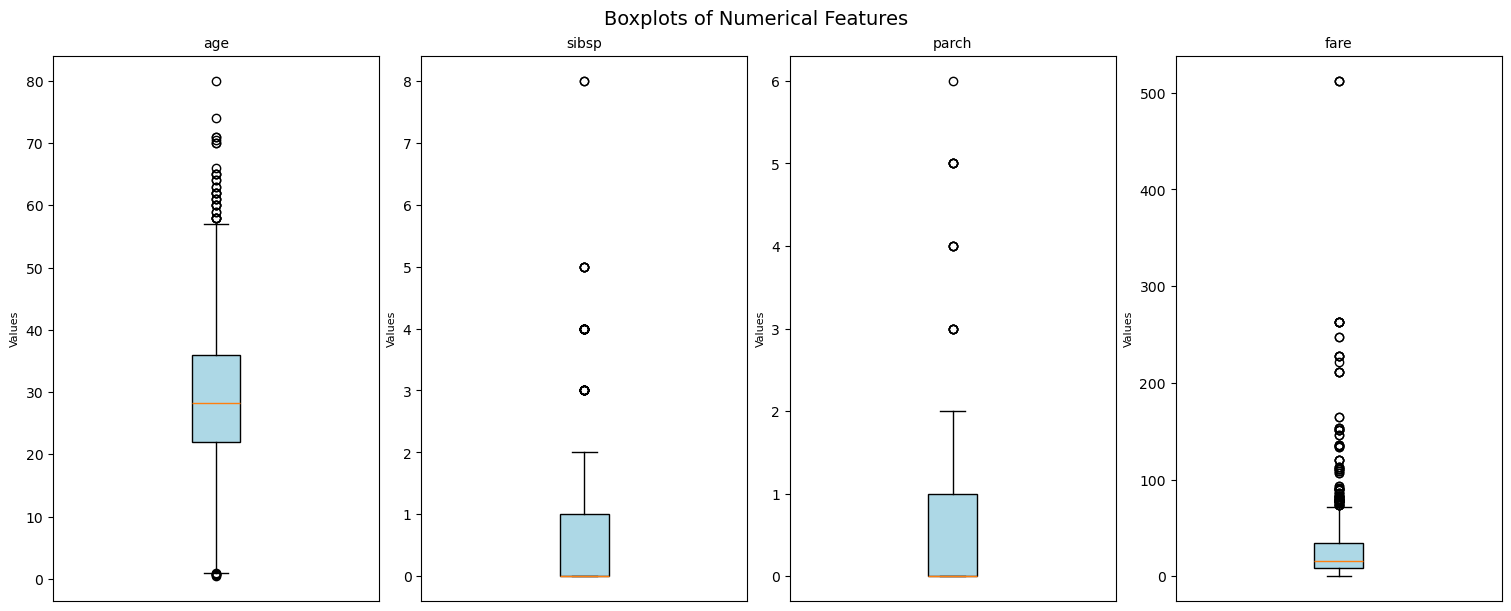

In [112]:
import matplotlib.pyplot as plt

# Define figure size and layout
fig, axes = plt.subplots(1, len(numerical_features) - 2, figsize=(15, 6), constrained_layout=True)

# Plot boxplots for each numerical feature
valid_features = [feature for feature in numerical_features if feature not in ['survived', 'pclass']]  # Exclude 'survived' and 'pclass'

for i, feature in enumerate(valid_features):
    axes[i].boxplot(df[feature], patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(feature, fontsize=10)
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-ticks
    axes[i].set_ylabel("Values", fontsize=8)

# Add an overall title for the figure
fig.suptitle("Boxplots of Numerical Features", fontsize=14)

plt.show()

Checking categorical features to assess variance and class distribution.

In [103]:
categorical_features = df.select_dtypes(include=['category','object','bool']).columns
categorical_features

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

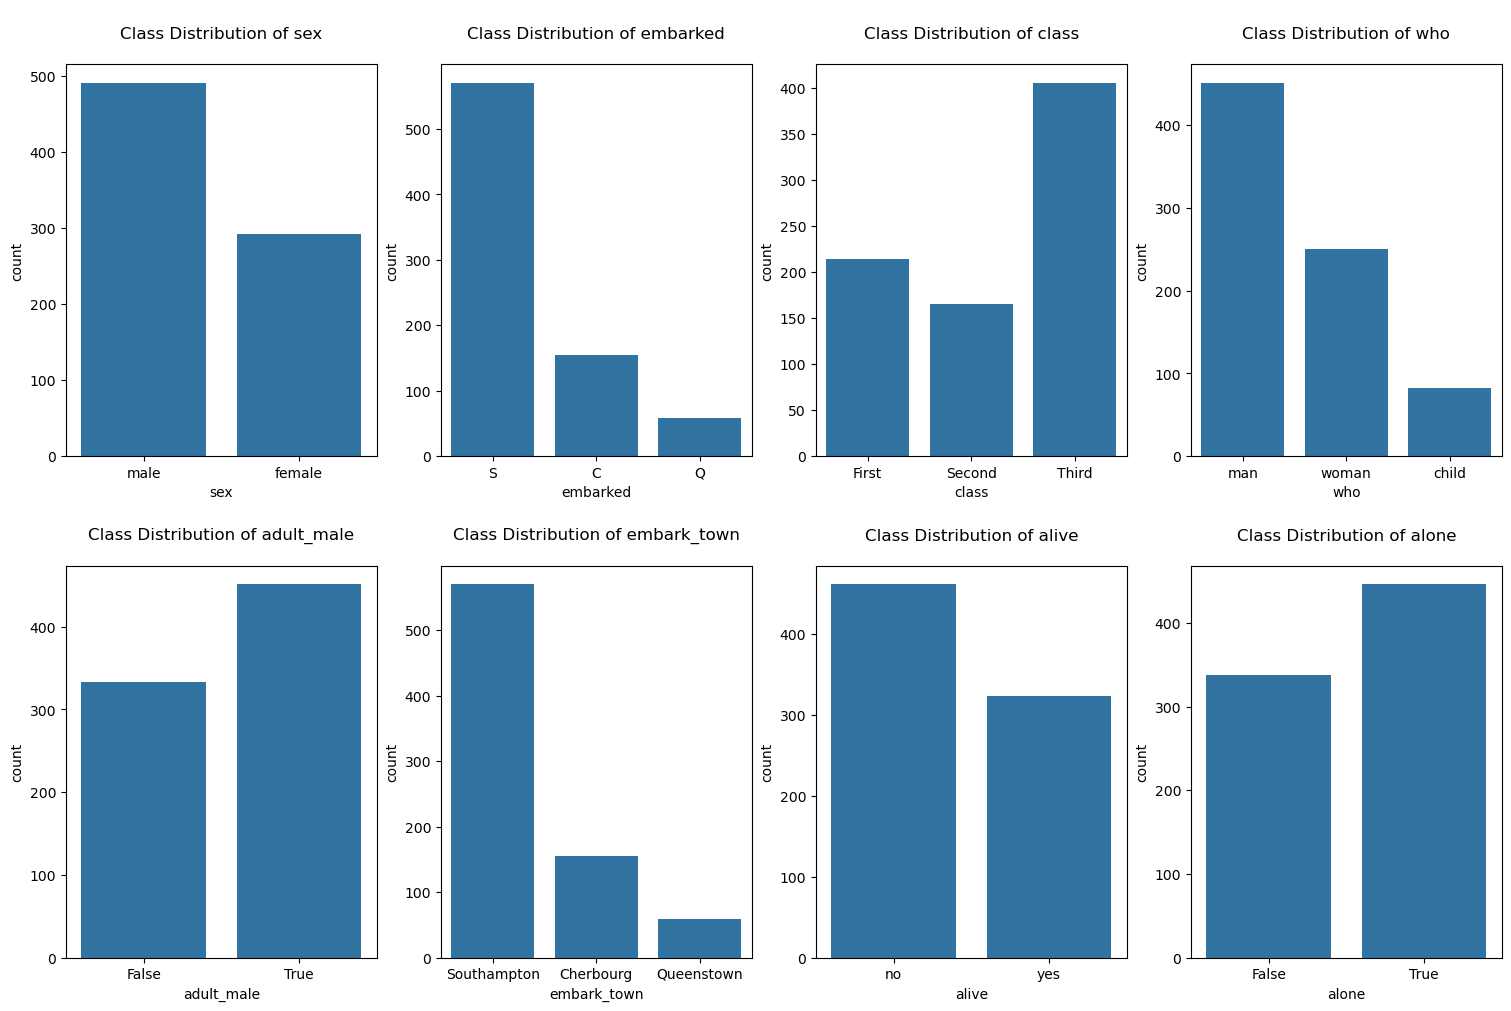

In [109]:
# Number of rows and columns
nrows = 2
ncols = (len(categorical_features) + 1) // 2  # Automatically adjust the number of columns

# Plot barplots for each feature in 2 rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)

# Flatten axes if there are multiple rows and columns
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'\nClass Distribution of {feature}\n')

plt.show()

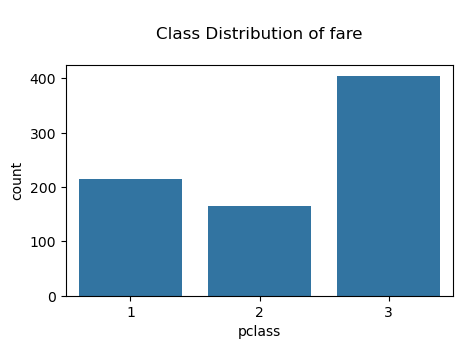

In [119]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='pclass')
ax.set_title(f'\nClass Distribution of {feature}\n')
plt.show()

Class distribution of target variable

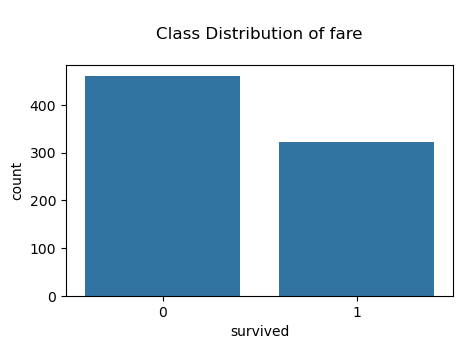

In [118]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='survived')
ax.set_title(f'\nClass Distribution of {feature}\n')
plt.show()

Data Transformation

- Smoothing - remove noise from data
- Aggregation - data is searched, gathered and presented in a summarized report based form
- Generalization - generating summary data with successive layers for a dataset
- Normalization - scaled to fall within a small specified range(Min-Max, Z-Score)

Data reduction

Most ML models may not be effective for high-dimensional data.

Data reduction can be done in 2 ways

- Feature Selection
- Feature Extraction